# Downloading data

In [6]:
# !pip install gdown --upgrade
# !gdown 1qHQ9BUmhJoDLZ40PaVJENmNJyT1_8M8C
# !unzip release-youtube-links.zip
# !rm release-youtube-links.zip
# !wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.ungraph.txt.gz
# !gzip -d com-youtube.ungraph.txt.gz
!wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.all.cmty.txt.gz
!gzip -d com-youtube.all.cmty.txt.gz
!wget https://snap.stanford.edu/data/bigdata/communities/com-youtube.top5000.cmty.txt.gz
!gzip -d com-youtube.top5000.cmty.txt.gz

--2022-03-19 08:24:14--  https://snap.stanford.edu/data/bigdata/communities/com-youtube.all.cmty.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 199.9.14.201, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341486 (333K) [application/x-gzip]
Saving to: ‘com-youtube.all.cmty.txt.gz’

com-youtube.all.cmt 100%[===================>] 333.48K  52.9KB/s    in 6.3s    

2022-03-19 08:24:25 (52.9 KB/s) - ‘com-youtube.all.cmty.txt.gz’ saved [341486/341486]

--2022-03-19 08:24:26--  https://snap.stanford.edu/data/bigdata/communities/com-youtube.top5000.cmty.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 199.9.14.201, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195662 (191K) [application/x-gzip]
Saving to: ‘com-youtube.top5000.cmty.txt

# Imports

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Creating graph

In [28]:
G = nx.Graph()
lines = []
lines_minus_one = []
with open('release-youtube-users.txt') as f:
    lines = f.readlines()
for line in lines:
    G.add_node(int(line)-1) 
    lines_minus_one.append(f"{int(line)-1}\n")
with open('release-youtube-users-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)
lines_minus_one = []
with open('release-youtube-links.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    G.add_edge(int(link[0])-1, int(link[1])-1)
    lines_minus_one.append(f"{int(link[0])-1}\t{int(link[1])-1}\n")
with open('release-youtube-links-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)

In [8]:
lines_minus_one = []
with open('com-youtube.all.cmty.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    elements_m1 = [int(element) - 1 for element in link]
    string_to_write = f"{elements_m1[0]}"
    for k in range(1, len(elements_m1)):
        string_to_write = string_to_write + f"\t{elements_m1[k]}"
    string_to_write = string_to_write + '\n'
    lines_minus_one.append(string_to_write)
with open('com-youtube.all.cmty.txt', 'w') as f:
    f.writelines(lines_minus_one)

# Exploring the graph

In [5]:
G = nx.read_edgelist("com-youtube.txt")

print(f"There are {len(G.nodes())} users")
print(f"There are {len(G.edges())} relations")
print(f"There is {nx.number_connected_components(G)} connected components")
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(f"There are {len(G.nodes())} users in the greatest connected component")
print(f"There are {len(G.edges())} relations in the greatest connected component")
print(f"There is {nx.number_connected_components(G)} connected components")

There are 1134890 users
There are 2987624 relations
There is 1 connected components
There are 1134890 users in the greatest connected component
There are 2987624 relations in the greatest connected component
There is 1 connected components


In [6]:
nx.write_edgelist(G, "com-youtube-connected")

# Exploring community data

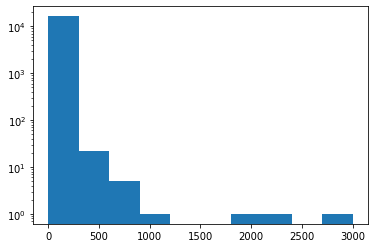

In [10]:
import matplotlib.pyplot as plt

size_of_community = []
with open('com-youtube.all.cmty.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    size_of_community.append(len(link))
plt.hist(size_of_community, bins=10)
plt.yscale('log')
plt.show()